In [9]:
import pandas as pd
df = pd.read_csv('C:/Users/HP/Downloads/Data_for_UCI_named.csv')
df_2 = df.copy()
df_2 = df_2.drop(columns= 'stab',axis=1)
df_2.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

<AxesSubplot:ylabel='stabf'>

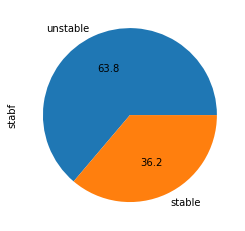

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import imblearn 
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix


scaler = StandardScaler()
X = df_2.drop(columns='stabf',axis =1)
Y = df_2['stabf']
Y.value_counts().plot.pie(autopct='%.1f')



In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

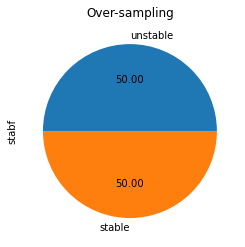

In [12]:
#random oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) # Float
#ros = RandomOverSampler(sampling_strategy="not majority") # String

X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

X_train_scale = scaler.fit_transform(X_train_ros)
X_train_scale =  pd.DataFrame(X_train_scale)

X_test_scale = scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale)

In [13]:
# Training Random Forest Models
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=3)
model.fit(X_train_scale , y_train_ros)

#y_train_pred = model.predict(X_scaled)
y_test_pred = model.predict(X_test_scale)


#model performance
print('accuracy score: {}'.format(accuracy_score(y_test,y_test_pred)))
recall = recall_score(y_test,y_test_pred,pos_label = 'stable')
print('Recall: {}'.format(recall))
 
cnf_mat = confusion_matrix(y_test, y_test_pred,labels=['stable','unstable'])
print(cnf_mat)

accuracy score: 0.9095
Recall: 0.8932178932178932
[[ 619   74]
 [ 107 1200]]


In [14]:
from sklearn.tree import DecisionTreeClassifier 
dec_tree = DecisionTreeClassifier(random_state=1) 
dec_tree.fit(X_train_scale , y_train_ros)

y_pred = dec_tree.predict(X_test_scale)

#model performance
print('accuracy score: {}'.format(accuracy_score(y_test,y_test_pred)))
recall = recall_score(y_test,y_test_pred,pos_label = 'stable')
print('Recall: {}'.format(recall))
 
cnf_mat = confusion_matrix(y_test, y_test_pred,labels=['stable','unstable'])
print(cnf_mat)

accuracy score: 0.9095
Recall: 0.8932178932178932
[[ 619   74]
 [ 107 1200]]


In [15]:
import numpy as np

from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1 ) 
f1_scores = [] 
#run for every split 
for train_index, test_index in skf.split(X_train_scale, y_train_ros):
    
    x_train, x_test = np.array(X_train_scale)[train_index], 
    np.array(X_train_scale)[test_index] 
    y_train, y_test = y_train_ros[train_index], y_train_ros[test_index] 
    model = dec_tree().fit(x_train, y_train) 
    #save result to list 
    f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(X_test_scale), pos_label= 'stable' ))

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
ht = []


for train_index, test_index in skf.split(X_train_scale,y_train_ros):
    x_train_fold, x_test_fold = X_train_scale[train_index], X_test_scale[test_index]
    y_train_fold, y_test_fold = y_train_ros[train_index], y_test[test_index]
    model.fit(x_train_fold, y_train_fold)
    ht.append(dec_tree.score(x_test_fold, y_test_fold))

    
# Print the output.
print('List of possible accuracy:', ht)
print('\nMaximum Accuracy That can be obtained from this model is:',max(ht)*100, '%')
print('\nMinimum Accuracy:',
      min(ht)*100, '%')
print('\nOverall Accuracy:',
      mean(ht)*100, '%')
print('\nStandard Deviation is:', stdev(ht))    

In [21]:
!pip install xgboost

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\HP\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\Users\HP\anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\HP\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\HP\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read op

# Xgboost and Lightgbm

In [20]:
#import lightgbm as lgb
import xgboost as xgb


xg=xgb.XGBClassifier(max_depth=7,learning_rate=0.05,
                     silent=1,eta=1,objective='multi:softprob',
                     num_round=50,num_classes=6)

xg.fit(X_train_scale , y_train_ros)
ypred_xgb=xg.predict(X_test_scaled) 
ypred_xgb

accuracy_xgb = accuracy_score(y_test,ypred_xgb)




ModuleNotFoundError: No module named 'xgboost'

In [ ]:
data_train = lgb.Dataset(X_train_scale ,label = y_train_ros)
params= {}
  
# Usually set between 0 to 1.
params['learning_rate']=0.5 
  
# GradientBoostingDecisionTree
params['boosting_type']='gbdt' 
  
# Multi-class since the target class has 6 classes.
params['objective']='multiclass' 
  
# Metric for multi-class
params['metric']='multi_logloss' 
params['max_depth']=7
params['num_class']=7 
  
# This value is not inclusive of the end value.
# Hence we have 6 classes the value is set to 7.
  
# Training the LightGBM Model
num_round =50
start = time.time()
lgbm = lgb.train(params,data_train,num_round)
stop = time.time()
  
#Execution time of the LightGBM Model
exec_time_lgbm = stop-start
exec_time_lgbm
  
# Predicting the output on the Test Dataset 
ypred_lgbm = lgbm.predict(X_test_scaled)
ypred_lgbm
y_pred_lgbm_class = [np.argmax(line) for line in ypred_lgbm]

In [ ]:
# Accuracy Score for the LightGBM Model
from sklearn.metrics import accuracy_score
accuracy_lgbm=accuracy_score(y_test,y_pred_lgbm_class)

# Comparing the Accuracy and Execution Time for both the Algorithms
comparison = {'Accuracy:':(accuracy_lgbm,accuracy_xgb),\
			'Execution Time(in seconds):':(exec_time_lgbm,exec_time_xgb)}
LGBM_XGB = pd.DataFrame(comparison)
LGBM_XGB .index = ['LightGBM','XGBoost']
LGBM_XGB

# On comparison we notice that LightGBM is
# faster and gives better accuracy.
comp_ratio=(203.594708/29.443264)
comp_ratio
print("LightGBM is "+" "+str(np.ceil(comp_ratio))+" "+\
	str("times")+" "+"faster than XGBOOST Algorithm")
